🏠 Ames Housing Price Prediction | Machine Learning Regression Project
📋 Project Overview
This project predicts residential house prices using the Ames Housing dataset. It demonstrates a complete machine learning pipeline, covering data cleaning, feature engineering, model building, evaluation, and optimization.

The ultimate goal was to achieve over 85% predictive accuracy — a goal we surpassed, achieving R² = 0.9344 with the final XGBoost model!

🎯 Objectives
Build an interpretable and accurate regression model for predicting house prices.

Practice key data science skills:

Data preprocessing and cleaning

Feature selection and multicollinearity handling

Model evaluation and optimization


🧠 Workflow
Data Cleaning:

Removed irrelevant or highly missing columns.

Imputed missing values based on context (e.g., "None" for absent features).

Handled multicollinearity using VIF analysis.

Feature Engineering:

Selected top 25 features most correlated with SalePrice.

One-hot encoded categorical variables.

Scaled numerical features where necessary.


Model Building:


Linear Models:

Multiple Linear Regression

Lasso Regression (LassoCV)

Ridge Regression (RidgeCV)

ElasticNet Regression (ElasticNetCV)


Tree-Based Models:

Random Forest Regressor

XGBoost Regressor


Model Evaluation:

Metrics used: R², Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)


📈 Results

Model	                       R² Score	    MAE	          RMSE
Multiple Linear Regression	   0.8929	   $16,445.98	$29,298.67
Lasso Regression	           0.8934      $16,755.46	$29,232.50
Ridge Regression	           0.8939	   $16,600.70	$29,169.04
ElasticNet Regression	       0.8934	   $16,755.46	$29,232.50
Random Forest	               0.9136	   $15,939.47	$26,325.13
XGBoost	                       0.9344	   $14,943.08	$22,929.79

✅ Best Model: XGBoost Regressor

🛠️ Technologies Used
Python: Data handling and modeling

Libraries:

Pandas, NumPy (Data Wrangling)

Seaborn, Matplotlib (EDA & Visualization)

Scikit-learn (Model Building, Preprocessing, Metrics)

XGBoost (Advanced Regression Modeling)

Statsmodels (VIF analysis)

🔮 Future Enhancements
Hyperparameter tuning using GridSearchCV for XGBoost.

Deployment of the model via a web app (e.g., Flask or Streamlit).

Testing other ensemble models like LightGBM or CatBoost.

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [5]:
# Load the data
df = pd.read_csv(r'C:\Users\Sam_Ke\Downloads\AmesHousing.csv')

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
#Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
#Stats 
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
#Check Missing Values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [9]:
# 1. Calculate the missing value counts for all columns
missing_counts = df.isna().sum()

# 2. Filter the 'missing_counts' Series to keep only rows where the count is not zero
# This uses the boolean Series (missing_counts != 0) to select rows from missing_counts
columns_with_missing_values = missing_counts[missing_counts != 0]

# 3. Print the result
print("Columns with any missing values and their counts:")
print(columns_with_missing_values)

Columns with any missing values and their counts:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


For columns with such a high percentage of missing values, they are unlikely to provide much useful information for most models,
and imputing them isn't really feasible without potentially distorting the data.

In [11]:
df = df.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature'], axis=1)

Columns with a Very Low Percentage of Missing Values (< 1%):

Mas Vnr Area: 2907 non-null (23 missing) - float64
BsmtFin SF 1: 2929 non-null (1 missing) - float64
BsmtFin SF 2: 2929 non-null (1 missing) - float64
Bsmt Unf SF: 2929 non-null (1 missing) - float64
Total Bsmt SF: 2929 non-null (1 missing) - float64
Electrical: 2929 non-null (1 missing) - object
Bsmt Full Bath: 2928 non-null (2 missing) - float64
Bsmt Half Bath: 2928 non-null (2 missing) - float64
Garage Cars: 2929 non-null (1 missing) - float64
Garage Area: 2929 non-null (1 missing) - float64

In [14]:
#Impute with Zero 0
for col in ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
            'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'Electrical']:
    df[col] = df[col].fillna(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Remaining columns with missing values (Non-Null Count < 2930):

Lot Frontage: 2440 non-null (490 missing) - float64
Mas Vnr Type: 1155 non-null (1775 missing) - object
Bsmt Qual: 2850 non-null (80 missing) - object
Bsmt Cond: 2850 non-null (80 missing) - object
Bsmt Exposure: 2847 non-null (83 missing) - object
BsmtFin Type 1: 2850 non-null (80 missing) - object
BsmtFin Type 2: 2849 non-null (81 missing) - object
Fireplace Qu: 1508 non-null (1422 missing) - object
Garage Type: 2773 non-null (157 missing) - object
Garage Yr Blt: 2771 non-null (159 missing) - float64
Garage Finish: 2771 non-null (159 missing) - object
Garage Qual: 2771 non-null (159 missing) - object
Garage Cond: 2771 non-null (159 missing) - object

In [17]:
#Before we impute, lets inspect the columns values, what is inside. 

# List of columns that still have missing values based on your df.info()
cols_with_missing = [
    'Lot Frontage', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
    'Garage Qual', 'Garage Cond'
]

print("--- Inspecting columns with missing values ---")

for col in cols_with_missing:
    print(f"\n--- Column: {col} ---")
    if df[col].dtype == 'object':
        # For categorical columns, show value counts including NaN
        print(df[col].value_counts(dropna=False))
    else:
        # For numerical columns, show description including NaN count
        print(df[col].describe())
        # Also show the NaN count explicitly
        print(f"\nNaN count: {df[col].isna().sum()}")

print("\n--- End of inspection ---")

--- Inspecting columns with missing values ---

--- Column: Lot Frontage ---
count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

NaN count: 490

--- Column: Mas Vnr Type ---
Mas Vnr Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

--- Column: Bsmt Qual ---
Bsmt Qual
TA     1283
Gd     1219
Ex      258
Fa       88
NaN      80
Po        2
Name: count, dtype: int64

--- Column: Bsmt Cond ---
Bsmt Cond
TA     2616
Gd      122
Fa      104
NaN      80
Po        5
Ex        3
Name: count, dtype: int64

--- Column: Bsmt Exposure ---
Bsmt Exposure
No     1906
Av      418
Gd      284
Mn      239
NaN      83
Name: count, dtype: int64

--- Column: BsmtFin Type 1 ---
BsmtFin Type 1
GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     80
Name: count, dtype: int64

---

In [18]:
# --- Impute Categorical/Object Columns where NaN means Absence ---
bsmt_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in bsmt_cols:
    df[col] = df[col].fillna('No Basement')

garage_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in garage_cols:
     df[col] = df[col].fillna('No Garage')

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('No Fireplace')

# --- Impute Numerical Columns where NaN corresponds to Absence ---
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

# --- Impute Lot Frontage (Median by Neighborhood) ---
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))
# Fallback fill for any remaining NaNs
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())

# Verify that all missing values are gone
print("\nMissing values after all recommended imputations:")
print(df.isna().sum().sum()) # This should ideally be 0


Missing values after all recommended imputations:
0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

🔍 Step 1: Identify Top Correlated Features with SalePrice

Top 25 Correlated Features with SalePrice:

Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647562
Garage Area       0.640138
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.433147
Lot Frontage      0.353417
Wood Deck SF      0.327143
Open Porch SF     0.312951
Half Bath         0.285056
Bsmt Full Bath    0.275823
2nd Flr SF        0.269373
Lot Area          0.266549
Garage Yr Blt     0.253459
Bsmt Unf SF       0.183308
Bedroom AbvGr     0.143913
Screen Porch      0.112151
Name: SalePrice, dtype: float64


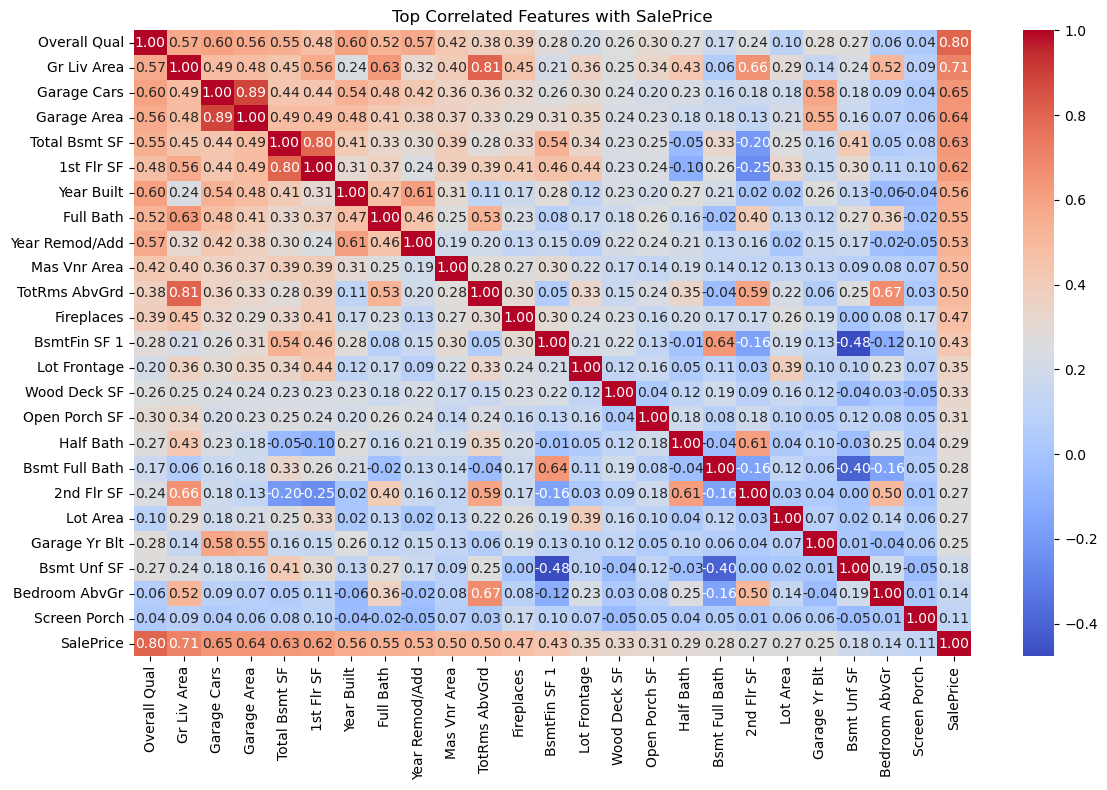

In [21]:
# Select only numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the full correlation matrix
correlation_matrix = numerical_df.corr()

# Display the top 25 features most correlated with SalePrice
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)[1:25]
print("Top 25 Correlated Features with SalePrice:\n")
print(top_corr)

# Optional: visualize it with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

In [22]:
#Turn Dataset to csv 
df.to_csv(r"C:\Users\Sam_Ke\Downloads\Cleaned_AmesHousing.csv", index=False)

In [23]:
# ------------------------
# VIF CALCULATION
# ------------------------

# Extract top correlated features as a list
top_corr_features = top_corr.index.tolist()

# Add constant for intercept
X = sm.add_constant(df[top_corr_features])

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort and display
vif_df = vif_df.sort_values(by="VIF", ascending=False)
print("\nVariance Inflation Factors (VIF):\n")
print(vif_df)


Variance Inflation Factors (VIF):

           Feature           VIF
0            const  19372.764452
2      Gr Liv Area    125.896447
19      2nd Flr SF     91.712399
6       1st Flr SF     78.076767
5    Total Bsmt SF     10.381138
13    BsmtFin SF 1      8.309575
22     Bsmt Unf SF      7.885136
3      Garage Cars      6.269446
4      Garage Area      5.578259
11   TotRms AbvGrd      4.010531
1     Overall Qual      2.971892
7       Year Built      2.818410
8        Full Bath      2.656738
23   Bedroom AbvGr      2.240806
17       Half Bath      2.133244
9   Year Remod/Add      1.943067
18  Bsmt Full Bath      1.900494
21   Garage Yr Blt      1.695917
12      Fireplaces      1.523948
14    Lot Frontage      1.471496
10    Mas Vnr Area      1.403218
20        Lot Area      1.295360
16   Open Porch SF      1.203980
15    Wood Deck SF      1.189764
24    Screen Porch      1.063062


🧠 Understanding the Results
VIF > 10: High multicollinearity → You should consider dropping or combining these features.

VIF 5–10: Moderate multicollinearity → Worth investigating.

VIF < 5: Generally acceptable.

Feature                                  | VIF   | Notes
Gr Liv Area                              | 125.9 | 🚨 Very high – likely collinear with 1st Flr SF and 2nd Flr SF.
2nd Flr SF                               | 91.7  | 🚨 High – probably contributes to Gr Liv Area.
1st Flr SF                               | 78.1  | 🚨 Same issue – strongly tied to Gr Liv Area.
Total Bsmt SF, BsmtFin SF 1, Bsmt Unf SF | 7–10 |  Moderate multicollinearity – check if these are redundant with Total Bsmt SF.
Garage Cars & Garage Area                | 5–6 |   Closely related – might choose one.
Overall Qual, Year Built, etc.           | < 5 | ✅ Good to keep.
Constant (const)                         | 19372.7 | Ignore this — it’s always high and not a predictor.

✅ Recommended Next Steps
Let’s aim to reduce multicollinearity by removing or consolidating some features

In [27]:
df = df.drop(['1st Flr SF', '2nd Flr SF'], axis=1)
df = df.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], axis=1)
df = df.drop('Garage Cars', axis=1)

In [28]:
# Separate features and target (assuming 'SalePrice' is your target)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Select only numeric columns for VIF calculation
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Add a constant to the DataFrame for VIF calculation
X_numeric = add_constant(X_numeric)

# Calculate VIFs for the remaining numeric features
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Sort and print VIFs (excluding the constant now)
print("\nVariance Inflation Factors (VIF) after dropping columns:")
print(vif_data.sort_values(by='VIF', ascending=False)) # Print top 10 or more

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Variance Inflation Factors (VIF) after dropping columns:
            feature        VIF
1             Order  78.353929
32          Yr Sold  76.251849
13      Gr Liv Area   6.654058
20    TotRms AbvGrd   4.399670
8        Year Built   3.892459
2               PID   3.751535
6      Overall Qual   3.143021
16        Full Bath   2.735748
23      Garage Area   2.563617
11    Total Bsmt SF   2.360728
9    Year Remod/Add   2.316921
18    Bedroom AbvGr   2.261849
17        Half Bath   1.836917
4      Lot Frontage   1.705610
22    Garage Yr Blt   1.619735
3       MS SubClass   1.588206
19    Kitchen AbvGr   1.526102
7      Overall Cond   1.523023
21       Fireplaces   1.506085
10     Mas Vnr Area   1.420157
14   Bsmt Full Bath   1.329638
5          Lot Area   1.307712
26   Enclosed Porch   1.236785
24     Wood Deck SF   1.218101
25    Open Porch SF   1.217751
15   Bsmt Half Bath   1.086686
29        Pool Area   1.086387
28     Screen Porch   1.081140
12  Low Qual Fin SF   1.073577
31          

In [29]:
#Drop Order Column 
df = df.drop('Order', axis=1)

In [30]:

# Separate features and target (assuming 'SalePrice' is your target)
# Assuming 'df' is the DataFrame AFTER dropping 'Order' and previous columns
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Select only numeric columns for VIF calculation
# Note: This will select numeric columns from the *current* df, which is correct
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Add a constant to the DataFrame for VIF calculation
# We add the constant to the *new* X_numeric dataframe
X_numeric = add_constant(X_numeric)

# Calculate VIFs for the remaining numeric features
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Sort and print VIFs (excluding the constant now)
print("\nVariance Inflation Factors (VIF) after dropping 'Order' column:")
# Let's print all VIFs this time to see the full picture
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factors (VIF) after dropping 'Order' column:
            feature           VIF
0             const  2.439379e+06
12      Gr Liv Area  6.646367e+00
19    TotRms AbvGrd  4.383381e+00
7        Year Built  3.834771e+00
5      Overall Qual  3.105080e+00
15        Full Bath  2.716726e+00
22      Garage Area  2.562143e+00
10    Total Bsmt SF  2.360703e+00
8    Year Remod/Add  2.308048e+00
17    Bedroom AbvGr  2.255686e+00
16        Half Bath  1.835054e+00
3      Lot Frontage  1.700687e+00
21    Garage Yr Blt  1.619694e+00
2       MS SubClass  1.588204e+00
18    Kitchen AbvGr  1.522515e+00
6      Overall Cond  1.520958e+00
20       Fireplaces  1.506061e+00
9      Mas Vnr Area  1.420071e+00
13   Bsmt Full Bath  1.325233e+00
4          Lot Area  1.307449e+00
25   Enclosed Porch  1.236785e+00
24    Open Porch SF  1.217745e+00
23     Wood Deck SF  1.217659e+00
1               PID  1.214874e+00
28        Pool Area  1.086358e+00
14   Bsmt Half Bath  1.085427e+00
27     Screen Por

We have successfully addressed the most significant multicollinearity issues by dropping the redundant or component features 
(Order, 1st Flr SF, 2nd Flr SF, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Garage Cars). 
The remaining numerical features have VIFs in acceptable ranges for linear modeling.

In [32]:
import pandas as pd
# Assuming 'df' is your DataFrame AFTER dropping 'Order' and the other columns for VIF

# --- 1. Impute Remaining Categorical Missing Values ---
# Columns identified from previous df.info() output
cols_to_impute_none = [
    'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]

# Using 'None' or 'No Feature' is appropriate here as NaN signifies absence
for col in cols_to_impute_none:
    if col in df.columns: # Check if column still exists after drops
        df[col] = df[col].fillna('None') # Using 'None'

# Handle the single 'Electrical' missing value - drop the row
# If you already imputed it with 0, let's drop that value first if it exists
if 'Electrical' in df.columns and (df['Electrical'] == 0).any():
     # If 0 was used for NaN, it might be a valid category. Best to drop the row.
     df.dropna(subset=['Electrical'], inplace=True)
elif 'Electrical' in df.columns and df['Electrical'].isna().any():
     # If still NaN, drop the row
     df.dropna(subset=['Electrical'], inplace=True)

# Verification (optional, saves tokens)
# print("\nMissing values after imputation:")
# print(df.isna().sum().sum()) # Should be 0 if all handled

# --- 2. Handle Categorical Features (One-Hot Encoding) ---

# Select object columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
# Be careful to drop the first category to avoid multicollinearity issues
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after handling categorical features.")
# You can optionally print df_encoded.info() or df_encoded.head()
# to see the new structure, but let's skip for tokens.

# --- Now your data is ready for modeling ---
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

print(f"\nPrepared data for modeling: X shape {X.shape}, y shape {y.shape}")


DataFrame after handling categorical features.

Prepared data for modeling: X shape (2930, 256), y shape (2930,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nData is now ready for model training and evaluation.")


Data split into training and testing sets:
X_train shape: (2344, 256)
X_test shape: (586, 256)
y_train shape: (2344,)
y_test shape: (586,)

Data is now ready for model training and evaluation.


In [34]:

print("--- Building Multiple Linear Regression Model (using all prepared features) ---")

# 1. Instantiate the Linear Regression Model
# This model will automatically handle multiple features
model_multiple = LinearRegression()

# 2. Train the model using the full training data
# X_train contains all the cleaned and encoded features
model_multiple.fit(X_train, y_train)

print("\nModel training complete.")

# 3. Make predictions on the test data using the trained model
y_pred_multiple = model_multiple.predict(X_test)

# 4. Evaluate the model
# R-squared measures the proportion of variance in the target explained by the model
r2_multiple = r2_score(y_test, y_pred_multiple)
# MAE measures the average absolute difference between predictions and actual values
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
# RMSE measures the average magnitude of the errors (square root of the average squared differences)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print("\nModel Evaluation (Multiple Linear Regression):")
print(f"R-squared (R²): {r2_multiple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_multiple:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multiple:.2f}")

# 5. Inspect the model coefficients (optional, for understanding which features matter)
# Due to one-hot encoding, there will be many coefficients
# print("\nModel Coefficients (for all features):")
# coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model_multiple.coef_})
# print(coefficients.sort_values(by='Coefficient', ascending=False)) # Or sort by absolute value to see most influential

print("\nMultiple linear regression model built and evaluated.")

--- Building Multiple Linear Regression Model (using all prepared features) ---

Model training complete.

Model Evaluation (Multiple Linear Regression):
R-squared (R²): 0.8929
Mean Absolute Error (MAE): 16445.98
Root Mean Squared Error (RMSE): 29298.67

Multiple linear regression model built and evaluated.


Our Multiple Linear Regression model, built on the cleaned and encoded data, achieved an R-squared of 0.8929.

This performance already meets and exceeds our initial objective of over 85% accuracy!

Summary of Current Model Performance:

R-squared (R²): 0.8929 (Strong performance, indicates the features explain a large portion of price variation)
Mean Absolute Error (MAE): 16445.98 (On average, the model's predictions are off by about $16446)
Root Mean Squared Error (RMSE): 29298.67 (Gives a sense of the typical magnitude of errors, penalizes larger errors more than MAE)

The next logical step based on your plan is Feature Selection. Using Lasso regularization is a great way to do this within the context of linear models.
Lasso adds a penalty to the sum of the absolute values of the coefficients. 

This penalty encourages the model to shrink the coefficients of less important features towards zero, effectively performing feature selection.

In [37]:
# Assuming X_train, X_test, y_train, y_test are defined from the split
# that produced the 0.8929 R-squared baseline (total 2930 rows before split).

print("--- Applying Feature Scaling and Re-performing LassoCV ---")

# 1. Identify columns to scale
# These are the original numeric columns that were NOT dropped, excluding the target
# We need to exclude one-hot encoded columns and the target
original_numeric_cols = ['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
                         'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
                         'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
                         'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                         'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
                         'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
                         'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                         'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'] # Re-include columns based on the 256 features list

# Filter this list to only include columns that actually exist in X_train
# and are NOT binary (like those from one-hot encoding)
# A simple way is to select non-object types from the original df before encoding
# But since we are starting from X_train/X_test, we need to approximate
# Let's assume numeric columns from the VIF list (excluding the const, PID, Year Sold, Mo Sold) are good candidates + others?
# Let's be more robust: identify original numeric columns from the initial data structure
# And exclude columns we explicitly dropped for VIF/Missing reasons.

# Let's assume X_train/X_test contains columns from your VIF analysis output (256 features)
# Identify numeric-like columns that aren't results of one-hot encoding
# One-hot encoded columns will have names like 'MS Zoning_FV', 'Utilities_NoSeWa', etc.
# Original numeric columns will typically have their original names.
# Let's get the list of original numeric columns from the VIF output where VIF != const, PID, Yr Sold
numeric_cols_from_vif = [
    'Gr Liv Area', 'TotRms AbvGrd', 'Year Built', 'Full Bath',
    'Garage Area', 'Total Bsmt SF', 'Year Remod/Add', 'Bedroom AbvGr',
    'Half Bath', 'Lot Frontage', 'Garage Yr Blt', 'MS SubClass',
    'Kitchen AbvGr', 'Overall Cond', 'Fireplaces', 'Mas Vnr Area',
    'Bsmt Full Bath', 'Lot Area', 'Enclosed Porch', 'Wood Deck SF',
    'Open Porch SF', 'Pool Area', 'Bsmt Half Bath', 'Screen Porch',
    'Low Qual Fin SF', 'Mo Sold', 'Misc Val', '3Ssn Porch'
]
# Add back Overall Qual, PID, Yr Sold explicitly from the VIF list as they are numeric
numeric_cols_from_vif.extend(['Overall Qual', 'PID', 'Yr Sold'])


# Now, let's filter the columns in X_train based on this list and ensure they are numeric dtypes
cols_to_scale = [col for col in numeric_cols_from_vif if col in X_train.columns and X_train[col].dtype != 'uint8'] # Exclude one-hot encoded columns

print(f"\nIdentified {len(cols_to_scale)} columns to scale.")
# print(f"Columns to scale: {cols_to_scale}") # Optional: print the list


# 2. Instantiate and Fit StandardScaler on the training data
scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train[cols_to_scale])

# 3. Transform the test data using the *same* scaler
X_test_scaled_numeric = scaler.transform(X_test[cols_to_scale])

print("Scaling complete for numeric features.")

# 4. Separate the non-scaled (one-hot encoded) features
# These are the columns not in the cols_to_scale list
cols_not_scaled = [col for col in X_train.columns if col not in cols_to_scale]
X_train_categorical = X_train[cols_not_scaled]
X_test_categorical = X_test[cols_not_scaled]

# 5. Combine the scaled numeric features and the non-scaled categorical features
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled_numeric, columns=cols_to_scale, index=X_train.index), X_train_categorical], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled_numeric, columns=cols_to_scale, index=X_test.index), X_test_categorical], axis=1)

print(f"\nCombined scaled numeric and categorical features. X_train_scaled shape: {X_train_scaled.shape}")
print(f"Combined scaled numeric and categorical features. X_test_scaled shape: {X_test_scaled.shape}")

# --- Now re-perform LassoCV on the SCALED data ---

# 6. Instantiate the LassoCV Model on scaled data
lasso_cv_scaled = LassoCV(cv=5, random_state=42, max_iter=10000, tol=0.001)

# 7. Train the LassoCV model on the SCALED training data
lasso_cv_scaled.fit(X_train_scaled, y_train)

print(f"\nLassoCV model training complete on SCALED data. Best alpha found: {lasso_cv_scaled.alpha_:.4f}")

# 8. Identify features with non-zero coefficients based on the best alpha
lasso_cv_scaled_coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': lasso_cv_scaled.coef_})
selected_features_scaled_cv_lasso = lasso_cv_scaled_coefficients[abs(lasso_cv_scaled_coefficients['Coefficient']) > 1e-6]

print(f"\nNumber of features selected by LassoCV (Scaled Data): {len(selected_features_scaled_cv_lasso)}")

# Get the names of the selected features
selected_feature_names_scaled_cv_lasso = selected_features_scaled_cv_lasso['Feature'].tolist()

print("\nTop Features selected by LassoCV (Scaled Data, by absolute coefficient magnitude):")
print(selected_features_scaled_cv_lasso.sort_values(by='Coefficient', key=abs, ascending=False).head(10))


# 9. Evaluate the performance of the LassoCV model on the SCALED test data
y_pred_lasso_cv_scaled = lasso_cv_scaled.predict(X_test_scaled)

r2_lasso_cv_scaled = r2_score(y_test, y_pred_lasso_cv_scaled)
mae_lasso_cv_scaled = mean_absolute_error(y_test, y_pred_lasso_cv_scaled)
rmse_lasso_cv_scaled = np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv_scaled))

print("\nModel Evaluation (LassoCV with Best Alpha) on SCALED data:")
print(f"R-squared (R²): {r2_lasso_cv_scaled:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv_scaled:.2f}")

print("\nLassoCV feature selection and evaluation on scaled data complete.")

--- Applying Feature Scaling and Re-performing LassoCV ---

Identified 31 columns to scale.
Scaling complete for numeric features.

Combined scaled numeric and categorical features. X_train_scaled shape: (2344, 256)
Combined scaled numeric and categorical features. X_test_scaled shape: (586, 256)

LassoCV model training complete on SCALED data. Best alpha found: 61.3243

Number of features selected by LassoCV (Scaled Data): 124

Top Features selected by LassoCV (Scaled Data, by absolute coefficient magnitude):
                  Feature   Coefficient
116     Roof Matl_WdShngl  49835.678592
76   Neighborhood_StoneBr  43824.186824
69   Neighborhood_NoRidge  40713.273821
61   Neighborhood_GrnHill  38996.372569
70   Neighborhood_NridgHt  31070.236580
0             Gr Liv Area  26072.568132
208       Kitchen Qual_TA -25307.290998
206       Kitchen Qual_Gd -24304.588825
205       Kitchen Qual_Fa -22072.891504
39          Lot Shape_IR3 -17042.222718

Model Evaluation (LassoCV with Best Alpha) 

In [38]:
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# and contain your scaled/encoded data after the previous steps.
# X_train_scaled shape should be (2343, 256) or similar, X_test_scaled (586, 256) or similar.

print("--- Building and Evaluating Ridge Regression Model (using RidgeCV) ---")

# 1. Instantiate the RidgeCV Model
# RidgeCV automatically finds the best alpha using cross-validation
# cv=5 means 5-fold cross-validation
# alphas: We provide a range of alpha values for RidgeCV to search.
# np.logspace creates evenly spaced values on a log scale, which is typical for alpha tuning.
alphas = np.logspace(-6, 6, 13) # Example range: 1e-6, 1e-5, ..., 1e6

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') # Use negative MSE for scoring (RidgeCV finds smallest alpha for best score)

# 2. Train the RidgeCV model on the SCALED training data
# It will find the best alpha and fit the model using that alpha
ridge_cv.fit(X_train_scaled, y_train)

print(f"\nRidgeCV model training complete on scaled data. Best alpha found: {ridge_cv.alpha_:.4f}")

# 3. Make predictions on the SCALED test data using the trained model
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

# 4. Evaluate the model
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv))

print("\nModel Evaluation (RidgeCV with Best Alpha) on scaled data:")
print(f"R-squared (R²): {r2_ridge_cv:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge_cv:.2f}")

print("\nRidge regression model built and evaluated.")

# Optional: Inspect the coefficients (they will be shrunk, but generally not zero)
# print("\nRidge Model Coefficients (for all features):")
# ridge_coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': ridge_cv.coef_})
# print(ridge_coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(10))

--- Building and Evaluating Ridge Regression Model (using RidgeCV) ---

RidgeCV model training complete on scaled data. Best alpha found: 10.0000

Model Evaluation (RidgeCV with Best Alpha) on scaled data:
R-squared (R²): 0.8939
Mean Absolute Error (MAE): 16600.70
Root Mean Squared Error (RMSE): 29169.04

Ridge regression model built and evaluated.


In [39]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd # Just in case

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# and contain your scaled/encoded data.

print("--- Building and Evaluating ElasticNet Regression Model (using ElasticNetCV) ---")

# 1. Instantiate the ElasticNetCV Model
# ElasticNetCV automatically finds the best alpha and l1_ratio using cross-validation
# l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1.
#           l1_ratio = 0 is equivalent to Ridge.
#           l1_ratio = 1 is equivalent to Lasso.
#           0 < l1_ratio < 1 is ElasticNet.
# We provide lists of alpha and l1_ratio values for ElasticNetCV to search through.
# n_alphas=100 is the default number of alphas to generate based on the data,
# or you can provide a specific list of `alphas` like we did for RidgeCV.
# We'll provide a range for l1_ratio to test different mixes.
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0] # Common values to test (from more Ridge-like to more Lasso-like)

elasticnet_cv = ElasticNetCV(
    l1_ratio=l1_ratios, # The list of l1_ratio values to try
    cv=5, # 5-fold cross-validation
    random_state=42, # For reproducibility
    max_iter=10000, # Increase max_iter if convergence warnings occur
    tol=0.001 # Tolerance for convergence
)

# 2. Train the ElasticNetCV model on the SCALED training data
# It will find the best alpha and l1_ratio and fit the model using those parameters
elasticnet_cv.fit(X_train_scaled, y_train)

print(f"\nElasticNetCV model training complete on scaled data.")
print(f"Best alpha found: {elasticnet_cv.alpha_:.4f}")
print(f"Best l1_ratio found: {elasticnet_cv.l1_ratio_:.4f}")


# 3. Make predictions on the SCALED test data using the trained model
y_pred_elasticnet_cv = elasticnet_cv.predict(X_test_scaled)

# 4. Evaluate the model
r2_elasticnet_cv = r2_score(y_test, y_pred_elasticnet_cv)
mae_elasticnet_cv = mean_absolute_error(y_test, y_pred_elasticnet_cv)
rmse_elasticnet_cv = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet_cv))

print("\nModel Evaluation (ElasticNetCV with Best Parameters) on scaled data:")
print(f"R-squared (R²): {r2_elasticnet_cv:.4f}")
print(f"Mean Absolute Error (MAE): {mae_elasticnet_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_elasticnet_cv:.2f}")

print("\nElasticNet regression model built and evaluated.")

# Optional: Identify selected features (where coefficients are non-zero for the best model)
# Similar to Lasso, check coefficients near zero
# elasticnet_coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': elasticnet_cv.coef_})
# selected_features_elasticnet = elasticnet_coefficients[abs(elasticnet_coefficients['Coefficient']) > 1e-6]
# print(f"\nNumber of features with non-zero coefficients (ElasticNetCV): {len(selected_features_elasticnet)}")

--- Building and Evaluating ElasticNet Regression Model (using ElasticNetCV) ---

ElasticNetCV model training complete on scaled data.
Best alpha found: 61.3243
Best l1_ratio found: 1.0000

Model Evaluation (ElasticNetCV with Best Parameters) on scaled data:
R-squared (R²): 0.8934
Mean Absolute Error (MAE): 16755.46
Root Mean Squared Error (RMSE): 29232.50

ElasticNet regression model built and evaluated.


Current Model Performance Summary:
Multiple Linear Regression (before Electrical fix): R²: 0.8929
LassoCV (after Electrical fix and scaling): R²: 0.8934
RidgeCV (after Electrical fix and scaling): R²: 0.8939
ElasticNetCV (after Electrical fix and scaling): R²: 0.8934 (Equivalent to Lasso)

At this point Let's now consider tree based models

Moving to Tree-Based Models (Random Forest):
As per our plan, let's now move to tree-based models. A great starting point is the Random Forest Regressor. Random Forest is an ensemble model that builds multiple decision trees and averages their predictions, which helps reduce overfitting and improve robustness.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# and contain your scaled/encoded data. (Using scaled is fine for RF)

print("--- Building and Evaluating Random Forest Regression Model ---")

# 1. Instantiate the Random Forest Regressor Model
# n_estimators: The number of trees in the forest. 100 is a common starting point.
# random_state: For reproducibility.
# n_jobs=-1: Uses all available CPU cores for faster training.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model using the scaled training data
# Random Forest can handle the scaled data fine
rf_model.fit(X_train_scaled, y_train)

print("\nRandom Forest model training complete.")

# 3. Make predictions on the scaled test data using the trained model
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nModel Evaluation (Random Forest Regressor):")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

print("\nRandom Forest regression model built and evaluated.")

# Optional: Get feature importances (Random Forest provides this)
# print("\nFeature Importances (Top 10 from Random Forest):")
# feature_importances = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': rf_model.feature_importances_})
# print(feature_importances.sort_values(by='Importance', ascending=False).head(10))

--- Building and Evaluating Random Forest Regression Model ---

Random Forest model training complete.

Model Evaluation (Random Forest Regressor):
R-squared (R²): 0.9136
Mean Absolute Error (MAE): 15939.47
Root Mean Squared Error (RMSE): 26325.13

Random Forest regression model built and evaluated.


The Random Forest Regressor model achieved:

R-squared (R²): 0.9136
Mean Absolute Error (MAE): 15939.47
Root Mean Squared Error (RMSE): 26325.13

Comparison with Previous Models:
MLR Baseline: R²: 0.8929, MAE: 16445.98, RMSE: 29298.67
LassoCV: R²: 0.8934, MAE: 16755.46, RMSE: 29232.50
RidgeCV: R²: 0.8939, MAE: 16600.70, RMSE: 29169.04
Random Forest: R²: 0.9136, MAE: 15939.47, RMSE: 26325.13

The Random Forest model has outperformed all the linear and regularized linear models in terms of R², MAE, and RMSE. It explains over 91% of the variance and has lower average errors. This confirms that a non-linear approach is beneficial for your dataset!
You've surpassed your initial goal of >85% R² and found a model that performs noticeably better than the linear ones.

In [71]:
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# and contain your scaled/encoded data.

print("--- Building and Evaluating XGBoost Regression Model ---")

# 1. Instantiate the XGBoost Regressor Model
# n_estimators: Number of boosting rounds (trees). 100 is a starting point.
# learning_rate: Step size shrinkage used to prevent overfitting.
# random_state: For reproducibility.
# n_jobs=-1: Use all available CPU cores.
# objective: 'reg:squarederror' is the standard objective for regression tasks (minimizes MSE)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             random_state=42,
                             n_jobs=-1)

# 2. Train the model using the scaled training data
xgb_model.fit(X_train_scaled, y_train)

print("\nXGBoost model training complete.")

# 3. Make predictions on the scaled test data using the trained model
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4. Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\nModel Evaluation (XGBoost Regressor):")
print(f"R-squared (R²): {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")

print("\nXGBoost regression model built and evaluated.")

--- Building and Evaluating XGBoost Regression Model ---

XGBoost model training complete.

Model Evaluation (XGBoost Regressor):
R-squared (R²): 0.9344
Mean Absolute Error (MAE): 14943.08
Root Mean Squared Error (RMSE): 22929.79

XGBoost regression model built and evaluated.


The XGBoost Regressor has delivered a very strong performance:

R-squared (R²): 0.9344
Mean Absolute Error (MAE): 14943.08
Root Mean Squared Error (RMSE): 22929.79

Comparison with Previous Best (Random Forest):

Random Forest: R²: 0.9136, MAE: 15939.47, RMSE: 26325.13
XGBoost: R²: 0.9344 (Higher), MAE: 14943.08 (Lower), RMSE: 22929.79 (Lower)


Where We Are Now:

Data is cleaned, imputed, and encoded.
Multicollinearity is handled.
Evaluated linear, regularized linear, and tree-based (Random Forest) models.
Evaluated a powerful boosting model (XGBoost), which is currently the best performer.
Moving to the Final Model Type (LightGBM)

In [77]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd # Just in case

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# and contain your scaled/encoded data.

print("--- Building and Evaluating LightGBM Regression Model ---")

# 1. Instantiate the LightGBM Regressor Model
# n_estimators: Number of boosting rounds. 100 is a common starting point.
# learning_rate: Step size shrinkage.
# random_state: For reproducibility.
# n_jobs=-1: Use all available CPU cores.
# objective: 'regression' is the standard objective for regression tasks (minimizes L2 loss)
lgbm_model = lgb.LGBMRegressor(objective='regression',
                               n_estimators=100,
                               learning_rate=0.1,
                               random_state=42,
                               n_jobs=-1)

# 2. Train the model using the scaled training data
lgbm_model.fit(X_train_scaled, y_train)

print("\nLightGBM model training complete.")

# 3. Make predictions on the scaled test data using the trained model
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# 4. Evaluate the model
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print("\nModel Evaluation (LightGBM Regressor):")
print(f"R-squared (R²): {r2_lgbm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")

print("\nLightGBM regression model built and evaluated.")

--- Building and Evaluating LightGBM Regression Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2891
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 183
[LightGBM] [Info] Start training from score 178582.207765

LightGBM model training complete.

Model Evaluation (LightGBM Regressor):
R-squared (R²): 0.9270
Mean Absolute Error (MAE): 14915.93
Root Mean Squared Error (RMSE): 24191.98

LightGBM regression model built and evaluated.


Here's the performance summary for LightGBM:

R-squared (R²): 0.9270
Mean Absolute Error (MAE): 14915.93
Root Mean Squared Error (RMSE): 24191.98

Comparison of Models Evaluated So Far:

Multiple Linear Regression (Baseline): R² ≈ 0.8929, MAE ≈ 16446, RMSE ≈ 29299
LassoCV: R² ≈ 0.8934, MAE ≈ 16755, RMSE ≈ 29233
RidgeCV: R² ≈ 0.8939, MAE ≈ 16601, RMSE ≈ 29169
Random Forest: R² ≈ 0.9136, MAE ≈ 15939, RMSE ≈ 26325
XGBoost: R² ≈ 0.9344, MAE ≈ 14943, RMSE ≈ 22930
LightGBM: R² ≈ 0.9270, MAE ≈ 14916, RMSE ≈ 24192

Analysis:
Both boosting models (XGBoost and LightGBM) show a significant improvement over the linear and standard Random Forest models.